<a href="https://colab.research.google.com/github/thravt/AIProjectsHomework/blob/main/HW3_Tyler_Thraves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

Write a Class called NeuralNetwork that has at least the following methods (you are free to add
your own methods too):

a. Initialization method.

b. Forward propagation method that performs forward propagation calculations.

c. Backward propagation method that implements the backpropagation algorithm
discussed in class.

d. Train method that includes the code for gradient descent.

e. Cost method that calculates the loss function.

f. Predict method that calculates the predictions for the test set.

Probably going to stick to the basic 6 methods, as if others were needed, they probably would've been mentioned in there.

For simplicity in implementation, I'll make a multi-layered perceptron with one hidden layer, so I don't have to worry about storing matrices of differing sizes.

I'll use a Sigmoid activation, as it's something I've implemented before in HW 1.

In [ ]:
#Neural Network Class
class NeuralNetwork:
  #Initialize the class
  def __init__(self, features):
    #Number of features
    self.features = features
    #initialize the all the weights to small random values
    self.W1 = np.random.rand(features, features) * 0.01
    self.b1 = np.zeros((features, 1))
    self.W2 = np.random.rand(1, features) * 0.01
    self.b2 = np.zeros((1, 1))
    self.cache = {}

  def ForwardProp(self, X):
    Z1 = np.dot(self.W1, X.T) + self.b1
    A1 = 1/(1 + np.exp(-Z1))
    self.cache["A1"] = A1
    Z2 = np.dot(self.W2, A1) + self.b2
    A2 = 1/(1 + np.exp(-Z2))
    self.cache["A2"] = A2
    return A2

  def Cost(self, y):
    cost = (-1 / len(y)) * np.sum(np.multiply(y, np.squeeze(np.log(self.cache["A2"]).T)) + np.multiply((1-np.array(y)), np.squeeze(np.log(1 - self.cache["A2"]).T)))
    return np.squeeze(cost)

  def BackProp(self, X, y):
    dZ2 = np.squeeze(self.cache["A2"].T) - y
    dZ2 = np.reshape(dZ2, (1, -1))
    dW2 = (1 / len(y)) * np.dot(dZ2,  self.cache["A1"].T)
    db2 = (1 / len(y)) * np.sum(dZ2)
    dZ1 = np.multiply(np.dot(self.W2.T, dZ2), (self.cache["A1"] * (1 - self.cache["A1"])))
    dW1 = (1 / len(y)) * np.dot(dZ1,  X)
    db1 = (1 / len(y)) * np.sum(dZ1)

    return dW1, db1, dW2, db2

  def Train(self, X, y, learning_rate, epochs):
    for i in range(epochs):
      print("Epoch ", i, ":")
      self.ForwardProp(X)
      cost = self.Cost(y)
      print("Cost: ", cost)
      dW1, db1, dW2, db2 = self.BackProp(X, y)
      self.W1 = self.W1 - (dW1 * learning_rate)
      self.b1 = self.b1 - (db1 * learning_rate)
      self.W2 = self.W2 - (dW2 * learning_rate)
      self.b2 = self.b2 - (db2 * learning_rate)
    pass
  def Predict(self, X):
    predictions = self.ForwardProp(X)
    predictions = np.round(predictions)
    return predictions








Testing the functions

**Test your NeuralNetwork Class with the dataset you selected. If the dataset is big, you may
notice inefficiencies in runtime. Try incorporating different versions of gradient descent to
improve that (Minibatch, Stochastic etc.). You may choose to use only a subset of your data for
this task (or any other technique). Explain which technique you followed and why.**

For this homework the dataset I used is this: https://www.kaggle.com/datasets/hopesb/student-depression-dataset/data. It met my size requirements without having too few features or being too hard to work with. It is a classification problem to determine how important factors are to whether or not a student has depression. I do somewhat worry about the computation time, but we'll see how it goes.
I decided to use batch gradient descent as it's been the most accurate for me in the past, and easiest for me to implement.

Code for installing Kaggle is below

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp /kaggle.json ~/.kaggle/


cp: cannot stat '/kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download hopesb/student-depression-dataset

Dataset URL: https://www.kaggle.com/datasets/hopesb/student-depression-dataset
License(s): apache-2.0
  0% 0.00/454k [00:00<?, ?B/s]
100% 454k/454k [00:00<00:00, 97.2MB/s]


In [ ]:
! unzip student-depression-dataset.zip

Archive:  student-depression-dataset.zip
  inflating: Student Depression Dataset.csv  


Download complete, Time to format the data

In [ ]:
file =('Student Depression Dataset.csv')
Database = pd.read_csv(file)

In [ ]:
#Remove unneeded features, that are either unneeded or too many to use one-hot for
Database = Database.drop('id', axis = 1)
Database = Database.drop('City', axis = 1)
Database = Database.drop('Profession', axis = 1)
Database = Database.drop('Work Pressure', axis = 1)
Database = Database.drop('Job Satisfaction', axis = 1)
Database = Database.drop('Degree', axis = 1)

In [ ]:
print(Database.isna().sum())

Gender                                   0
Age                                      0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [ ]:
#That's an amount that can easily be removed with little consequence
Database = Database.dropna()
print(Database.isna().sum())

Gender                                   0
Age                                      0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [ ]:
#Remove rows with value of "Others", as that's not really quantifiable
Database = Database[Database['Sleep Duration'] != "Others"]
Database = Database[Database['Dietary Habits'] != "Others"]

In [ ]:
print(Database)

       Gender   Age  Academic Pressure  CGPA  Study Satisfaction  \
0        Male  33.0                5.0  8.97                 2.0   
1      Female  24.0                2.0  5.90                 5.0   
2        Male  31.0                3.0  7.03                 5.0   
3      Female  28.0                3.0  5.59                 2.0   
4      Female  25.0                4.0  8.13                 3.0   
...       ...   ...                ...   ...                 ...   
27896  Female  27.0                5.0  5.75                 5.0   
27897    Male  27.0                2.0  9.40                 3.0   
27898    Male  31.0                3.0  6.61                 4.0   
27899  Female  18.0                5.0  6.88                 2.0   
27900    Male  27.0                4.0  9.24                 1.0   

          Sleep Duration Dietary Habits Have you ever had suicidal thoughts ?  \
0              5-6 hours        Healthy                                   Yes   
1              5-6 ho

In [ ]:
#Convert values to numerical values, including one-hot for the location
Database['Gender'] = Database['Gender'].replace({'Male': 1, 'Female': 0})
Database['Sleep Duration'] = Database['Sleep Duration'].replace({'5-6 hours': 5.5, 'Less than 5 hours': 0, '7-8 hours': 7.5, 'More than 8 hours': 9})
Database['Dietary Habits'] = Database['Dietary Habits'].replace({'Healthy': 1, 'Moderate': 0.5, 'Unhealthy': 0})
Database['Have you ever had suicidal thoughts ?'] = Database['Have you ever had suicidal thoughts ?'].replace({'Yes': 1, 'No': 0})
Database['Family History of Mental Illness'] = Database['Family History of Mental Illness'].replace({'Yes': 1, 'No': 0})

<ipython-input-8-7a32a8e5a65b>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Database['Gender'] = Database['Gender'].replace({'Male': 1, 'Female': 0})
<ipython-input-8-7a32a8e5a65b>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Database['Sleep Duration'] = Database['Sleep Duration'].replace({'5-6 hours': 5.5, 'Less than 5 hours': 0, '7-8 hours': 7.5, 'More than 8 hours': 9})
<ipython-input-8-7a32a8e5a65b>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the 

In [ ]:
print(Database)

       Gender   Age  Academic Pressure  CGPA  Study Satisfaction  \
0           1  33.0                5.0  8.97                 2.0   
1           0  24.0                2.0  5.90                 5.0   
2           1  31.0                3.0  7.03                 5.0   
3           0  28.0                3.0  5.59                 2.0   
4           0  25.0                4.0  8.13                 3.0   
...       ...   ...                ...   ...                 ...   
27896       0  27.0                5.0  5.75                 5.0   
27897       1  27.0                2.0  9.40                 3.0   
27898       1  31.0                3.0  6.61                 4.0   
27899       0  18.0                5.0  6.88                 2.0   
27900       1  27.0                4.0  9.24                 1.0   

       Sleep Duration  Dietary Habits  Have you ever had suicidal thoughts ?  \
0                 5.5             1.0                                      1   
1                 5.5  

Data is looking good, time to test it

Trying to test the whole thing means I quickly run out of ram, I'm going to test only about 2000

In [ ]:
SampleData = Database.sample(n=2000)
X = SampleData.drop('Depression', axis = 1)
y = SampleData['Depression']
print(X)
print(y)


       Gender   Age  Academic Pressure  CGPA  Study Satisfaction  \
3615        0  34.0                1.0  5.90                 3.0   
20254       1  25.0                3.0  7.53                 3.0   
8137        1  21.0                5.0  5.76                 3.0   
2086        0  19.0                5.0  5.32                 3.0   
15919       0  25.0                5.0  7.27                 4.0   
...       ...   ...                ...   ...                 ...   
14322       1  26.0                4.0  6.37                 1.0   
12646       1  29.0                4.0  5.86                 1.0   
4071        1  20.0                4.0  6.82                 3.0   
8395        1  28.0                5.0  9.56                 2.0   
12581       1  24.0                3.0  7.13                 1.0   

       Sleep Duration  Dietary Habits  Have you ever had suicidal thoughts ?  \
3615              7.5             0.5                                      0   
20254             0.0  

In [ ]:
Model = NeuralNetwork(11)

In [ ]:
Model.Train(X, y, 0.03, 1000)

Epoch  0 :
Cost:  0.669905237721918
Epoch  1 :
Cost:  0.669820377795276
Epoch  2 :
Cost:  0.6697351876454909
Epoch  3 :
Cost:  0.6696496666464343
Epoch  4 :
Cost:  0.669563814174727
Epoch  5 :
Cost:  0.6694776296099249
Epoch  6 :
Cost:  0.6693911123347018
Epoch  7 :
Cost:  0.6693042617350341
Epoch  8 :
Cost:  0.6692170772003825
Epoch  9 :
Cost:  0.6691295581238731
Epoch  10 :
Cost:  0.6690417039024779
Epoch  11 :
Cost:  0.6689535139371937
Epoch  12 :
Cost:  0.6688649876332206
Epoch  13 :
Cost:  0.6687761244001362
Epoch  14 :
Cost:  0.6686869236520736
Epoch  15 :
Cost:  0.6685973848078934
Epoch  16 :
Cost:  0.6685075072913562
Epoch  17 :
Cost:  0.6684172905312941
Epoch  18 :
Cost:  0.668326733961779
Epoch  19 :
Cost:  0.6682358370222917
Epoch  20 :
Cost:  0.6681445991578873
Epoch  21 :
Cost:  0.6680530198193592
Epoch  22 :
Cost:  0.6679610984634035
Epoch  23 :
Cost:  0.6678688345527789
Epoch  24 :
Cost:  0.6677762275564675
Epoch  25 :
Cost:  0.667683276949831
Epoch  26 :
Cost:  0.667589

In [ ]:
predictions = Model.Predict(X)

In [ ]:
wrong = np.squeeze(predictions) - np.squeeze(y)
wrong = np.abs(wrong)
totalwrong = np.sum(wrong)
print(1 - (totalwrong / 2000))

0.773


As we can see, the model gives an accuracy of 0.773, which to be honest for a model made from scratch, I'm pretty happy with it. I probably would've been able to use more data points had I used less nodes, but every time I go over the ram limit I have to redownload the data set and run all the prelimiary code, so I don't feel very inclined to gradually work towards the limit.

# **Part 2 (50 points)**

**Task 1 (5 points): Assuming you are not familiar with the framework, in this part of the
homework you will present your research describing the resources you used to learn the
framework (must include links to all resources). Clearly explain why you needed a particular
resource for implementing a 2-layer Neural Network (NN). (Consider how you will keep track of
all the computations in a NN i.e., what libraries/tools do you need within this framework.)**

For this homework I will once again be using Tensorflow. I will create a sequential model with tf.keras.Sequential https://www.tensorflow.org/guide/keras/sequential_model, use the gradient tape's gradient method https://www.tensorflow.org/guide/autodiff to get the gradient of each variable, and then use the apply of the optimizer https://www.tensorflow.org/api_docs/python/tf/keras/Optimizer with the gradients and variables to update the variables. This should allow me to use the tape for all layers at once, and apply it to the optimizer for each training loop. The tape will remember and apply all the loops, and the sequential mod

**Task 2 (35 points): Once you have figured out the resources you need for the project, you
should design and implement your project. The project must include the following steps (it’s
not limited to these steps):**

In [ ]:
import tensorflow as tf

**1. Exploratory Data Analysis (Can include data cleaning, visualization etc.)**

I'm going to start by standardizing the data so that it the model can handle it the best. After that I will print paired scatter plots to tell the distribution and correlation of the data.

In [ ]:
StandData = Database.copy()

In [ ]:
#Age, Academic Pressure, CGPA, Study Satisfaction, Sleep Duration, Dietary Habits, Work/Study Hours, Financial Stress
StandData['Age'] = (StandData['Age'] - StandData['Age'].mean()) / StandData['Age'].std()
StandData['Academic Pressure'] = (StandData['Academic Pressure'] - StandData['Academic Pressure'].mean()) / StandData['Academic Pressure'].std()
StandData['CGPA'] = (StandData['CGPA'] - StandData['CGPA'].mean()) / StandData['CGPA'].std()
StandData['Study Satisfaction'] = (StandData['Study Satisfaction'] - StandData['Study Satisfaction'].mean()) / StandData['Study Satisfaction'].std()
StandData['Sleep Duration'] = (StandData['Sleep Duration'] - StandData['Sleep Duration'].mean()) / StandData['Sleep Duration'].std()
StandData['Dietary Habits'] = (StandData['Dietary Habits'] - StandData['Dietary Habits'].mean()) / StandData['Dietary Habits'].std()
StandData['Work/Study Hours'] = (StandData['Work/Study Hours'] - StandData['Work/Study Hours'].mean()) / StandData['Work/Study Hours'].std()
StandData['Financial Stress'] = (StandData['Financial Stress'] - StandData['Financial Stress'].mean()) / StandData['Financial Stress'].std()


I will use seaborn to plot the paired scatter plots, just like in HW 1.

In [ ]:
import seaborn as sns

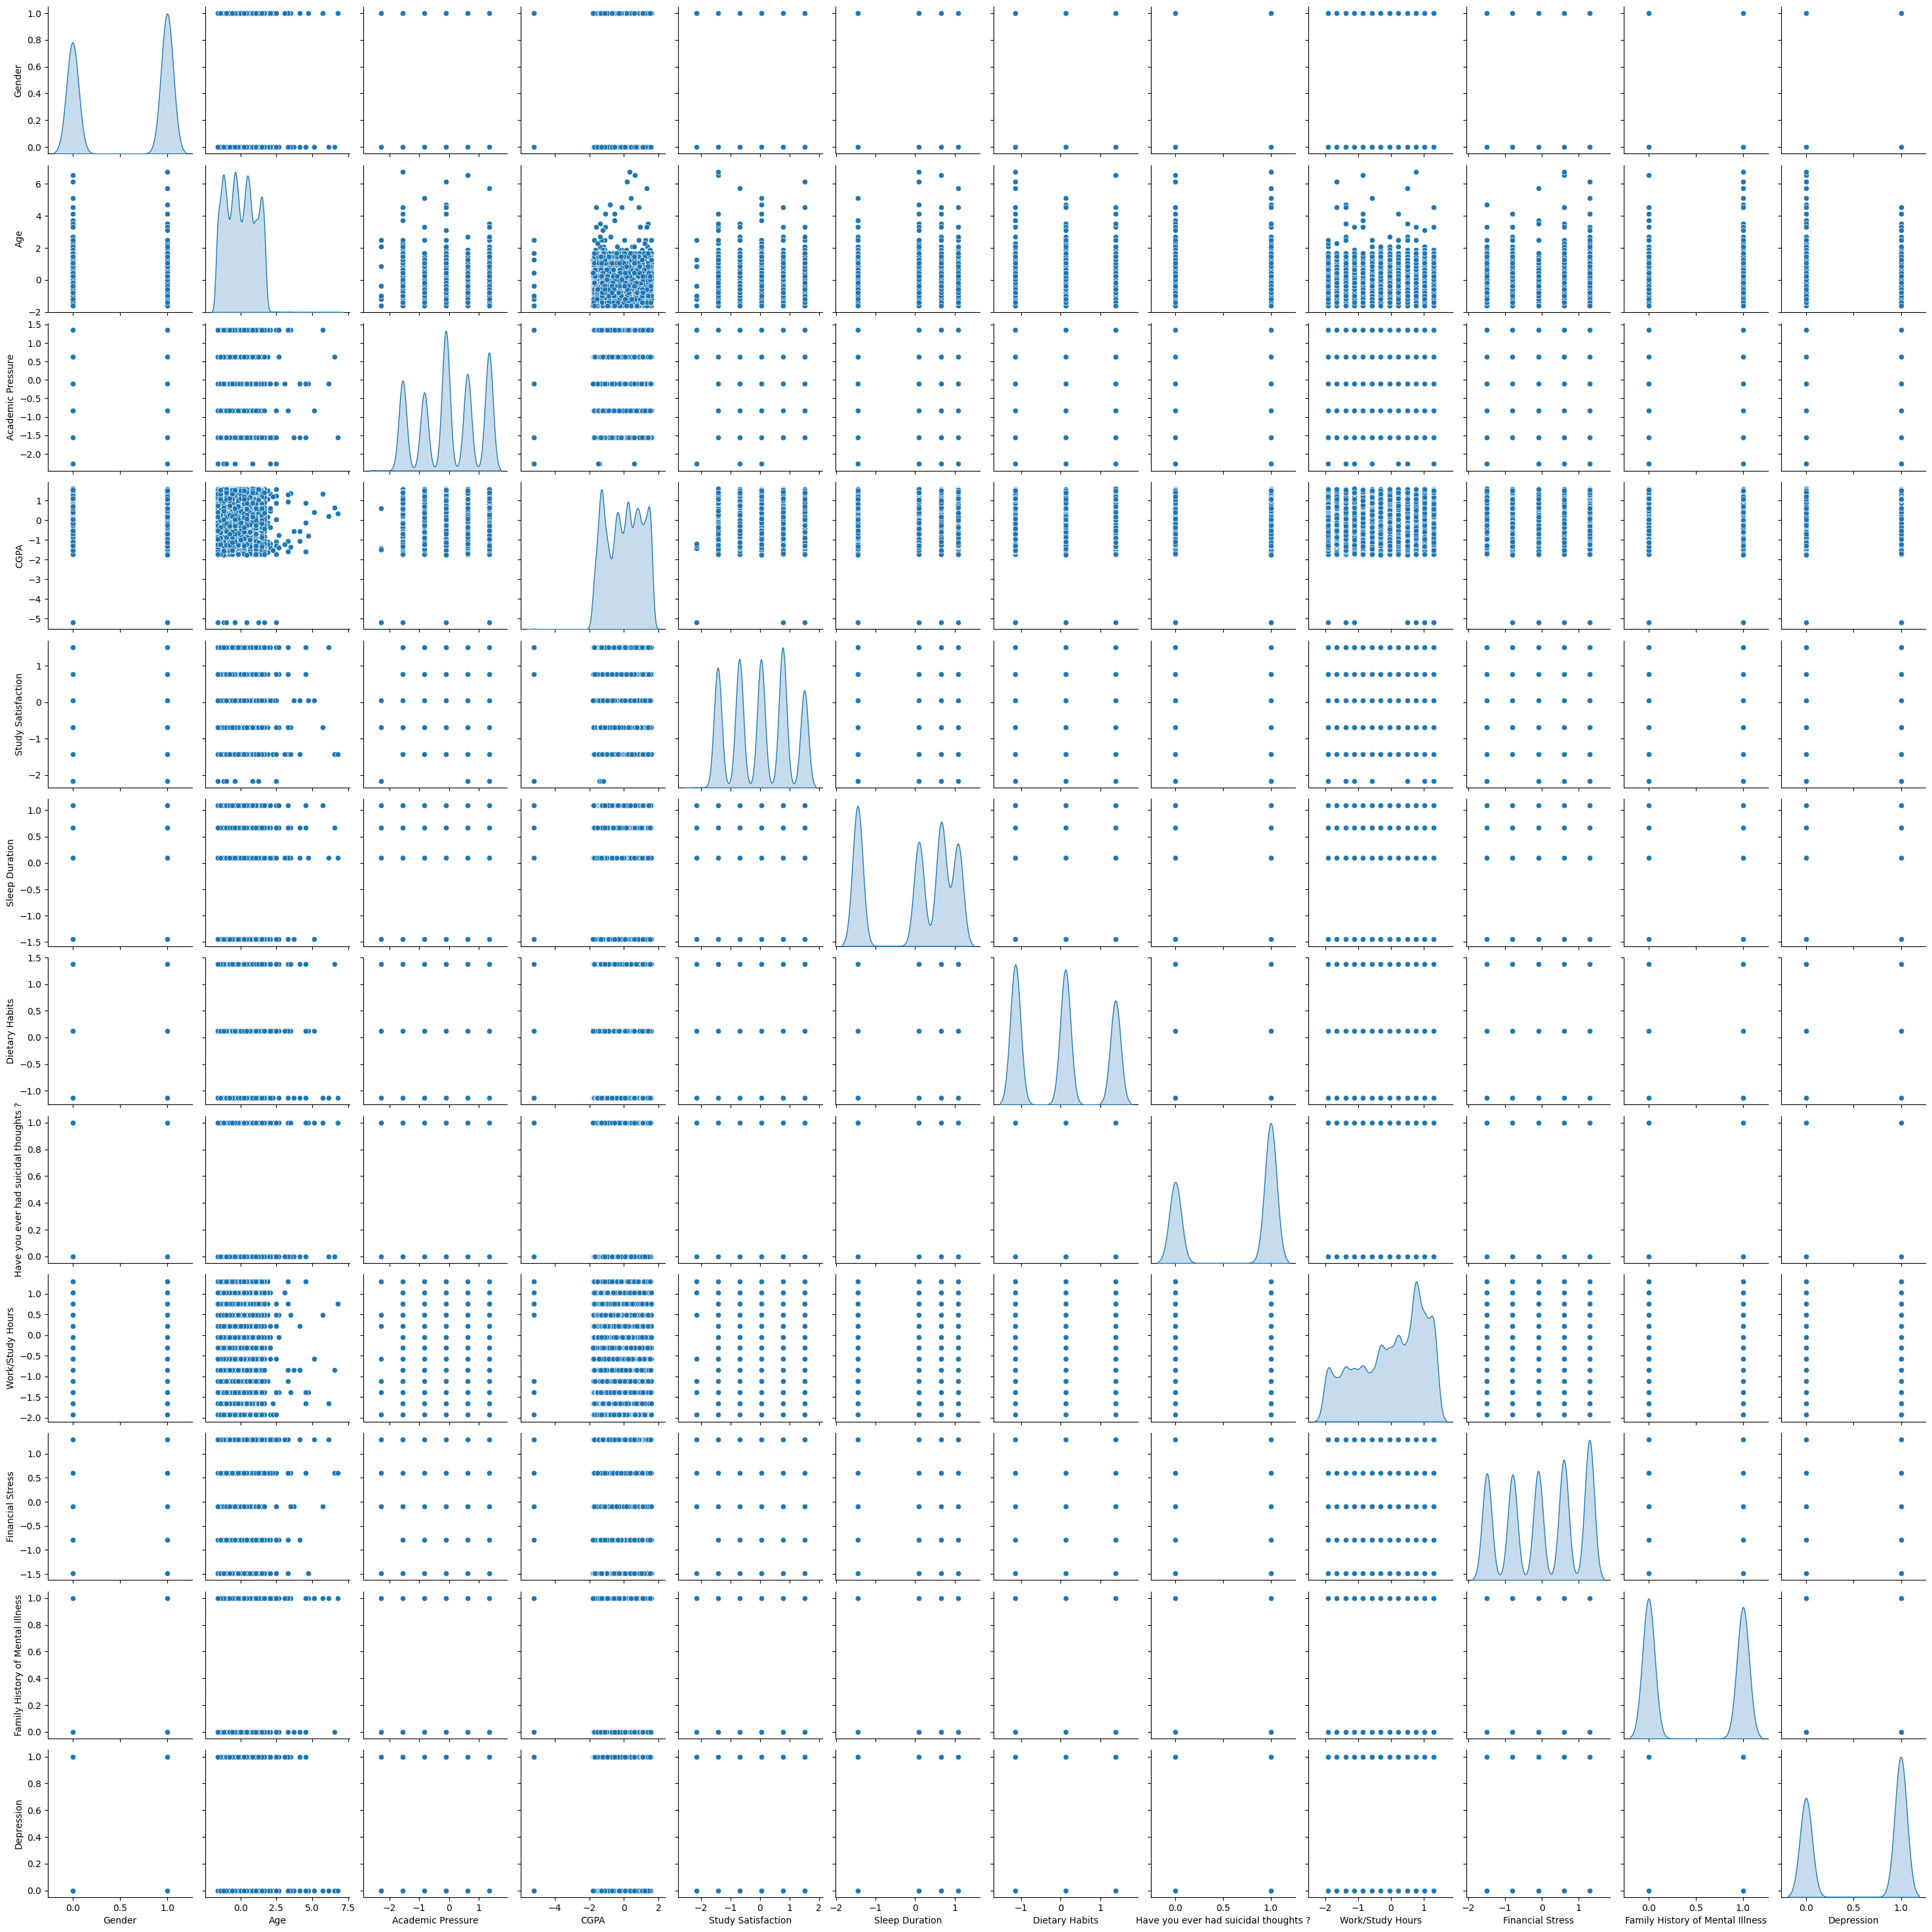

In [ ]:
sns.pairplot(StandData, diag_kind='kde')

Judging by the graphs, there's a good mix of data distributed throughout, and there doesn't seem to be much correlation between the values. But just to be safe, I'll use a heatmap as well.

<Axes: >

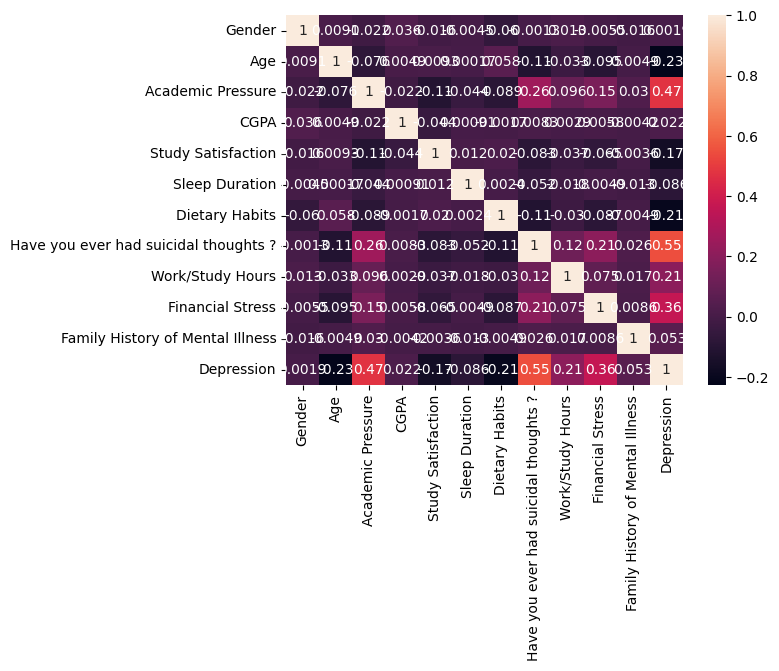

In [ ]:
sns.heatmap(StandData.corr(), annot= True)

Ignoring the target column, it seems I was correct in my assessment. The data seems like low correlation, so it's good to go for the network.

**2. Perform a train-dev-test split**

After searching online for the best way to split the data, I the found the train_test_split method from scikit https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html to be what I needed.

In [ ]:
#Split X and y
X = StandData.drop('Depression', axis = 1)
y = StandData['Depression']


In [ ]:
#import the needed library
from sklearn.model_selection import train_test_split

In [ ]:
#Get first split, using random state for reproducability
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.1, random_state=64)

In [ ]:
#Get second split, using random state for reproducability
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=64)

**3. Implement forward propagation (clearly describe the activation functions and other
hyper-parameters you are using).**

For this model, I will be using the sigmoid activation function, as it's what I used for the model from scratch, so I feel there'd be a better comparison there. For this network I will use 10 neurons per layer. I will be using the Adam optimizer, as it tends to rate highly in most aspects. I will be using the default hyperparameters for Adam.

In [ ]:
#making the model to train
model = tf.keras.Sequential(
    [
      tf.keras.layers.Dense(10, activation='sigmoid'),
      tf.keras.layers.Dense(1, activation='sigmoid'),
  ])

**4. Compute the final cost function.**

I will use tf.keras.losses.BinaryCrossentropy, as it's NLL, and the same as the last model.

In [ ]:
lossfunction = tf.keras.losses.BinaryCrossentropy()

With no training, here's how things currently stand:

In [ ]:
predictions = model(X_train)
print(lossfunction(y_train, predictions).numpy())

0.75604886


**5. Implement gradient descent (any variant of gradient descent depending upon your
data and project can be used) to train your model. In this step it is up to you as someone
in charge of their project to improvise using optimization algorithms (Adams, RMSProp
etc.) and/or regularization. Experiment with normalized inputs i.e. comment on how
your model performs when the inputs are normalized**

the training will be done through a simple for loop over epochs, with the gradient tape to store and apply the losses.

In [ ]:
optimizer = tf.keras.optimizers.Adam()

In [ ]:
for i in range(1000):
  with tf.GradientTape() as tape:
    predictions = model(X_train)
    loss = lossfunction(y_train, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply(gradients, model.trainable_variables)
  if (i % 100 == 99):
    print("Train loss: ", loss.numpy())
    validpredictions = model(X_val)
    validloss = lossfunction(y_val, validpredictions)
    print("Validation loss: ", validloss.numpy())

Train loss:  0.65798664
Validation loss:  0.64902794
Train loss:  0.57787836
Validation loss:  0.56830174
Train loss:  0.50733095
Validation loss:  0.49715593
Train loss:  0.45651948
Validation loss:  0.44474676
Train loss:  0.4228207
Validation loss:  0.40868953
Train loss:  0.40042531
Validation loss:  0.383767
Train loss:  0.38520038
Validation loss:  0.36634108
Train loss:  0.37464008
Validation loss:  0.35418004
Train loss:  0.36720908
Validation loss:  0.34582174
Train loss:  0.36194915
Validation loss:  0.34023452


Ok, so the Validation loss was somehow lower than the training loss. This is a very good sign, as the model isn't overfitting, and they both gave a small score anyways. I think normalizing the data was very helpful in that regard.

**6. Present the results using the test set.**



In [ ]:
testpredictions = model(X_test)
accuracytester = tf.keras.metrics.BinaryAccuracy()
testaccuracy = accuracytester(y_test, testpredictions)
print("Test accuracy: ", testaccuracy.numpy())

Test accuracy:  0.8472023


The test set gives an accuracy of 84%. That's very good, and an improvement over the 77% I got on my model from scratch. Going to be honest, I originally made a 3 layer model thinking it was a 2 layer model, and it gave an accuracy of 85%. All of the previous steps have been updated with the actual 2 step model, but the takeaway seems to be that more layers will result in an increased accuracy, but at diminishing returns. While the neural network structure makes it hard to tell how much each factor contributed (since I can't just pull up the weights), it seems like given a set of factors it would make a good prediction.

**Task 3 (10 points): In task 2 describe how you selected the hyperparameters. What was the
rationale behind the technique you used? Did you use regularization? Why, or why not? Did you use
an optimization algorithm? Why or why not?**

I decided on the specific optimizer used since I knew that Adam was commonly used in neural networks, and I know from personal experience that it works well. I also figured being able to scale the variables seperately through Adam would be more efficient, so that's why I decided to use it.

For hyperparameters, I decided to use the defaults for tensorflow's Adam optimizer, as I didn't know which changes would be helpful vs harmful, and with the default performance as good as it is, it wouldn't be worth the amount of retraining it would take. There's also that the validation set was doing good as well, so I didn't see a need to change the model. I chose the amount of epochs to be 1000, as it was long enough to train most of the loss out, but not too long to cause overfitting.

I decided to use regularization, as everything I've read seems to indicate that neural networks tend to work the best when given regularized data. With how much and how fast the loss shrunk compared to my original model from Task 1, I'm inclined to agree.

Overall I'd call this model a success. It was able to give a great prediction rate for the test data, and even the neural network from scratch performed decently, which shows how good these networks can be. Definitely a model I'll remember to use.